In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('./input/titanic/train.csv')
test = pd.read_csv('./input/titanic/test.csv')
submission = pd.read_csv('./input/titanic/gender_submission.csv')
train.shape, test.shape, submission.shape

((891, 12), (418, 11), (418, 2))

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


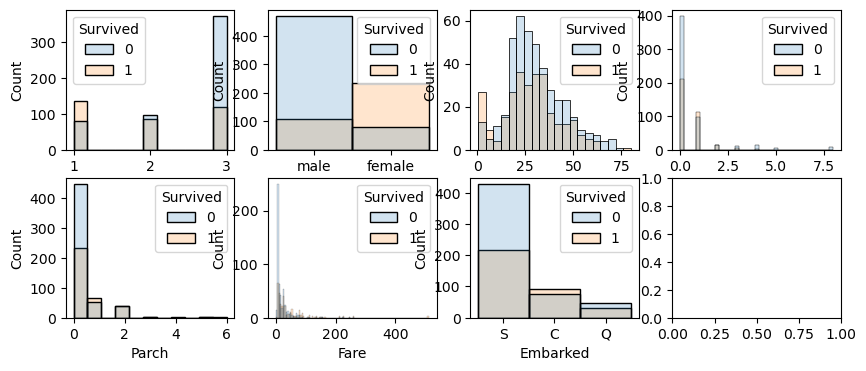

In [5]:
columns = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
fig, ax = plt.subplots(2,4,figsize=(10,4))
ax = ax.flatten()
for i, col in enumerate(columns):
    sns.histplot(data=train, x=col, hue='Survived', ax=ax[i], alpha=0.2)
plt.show()

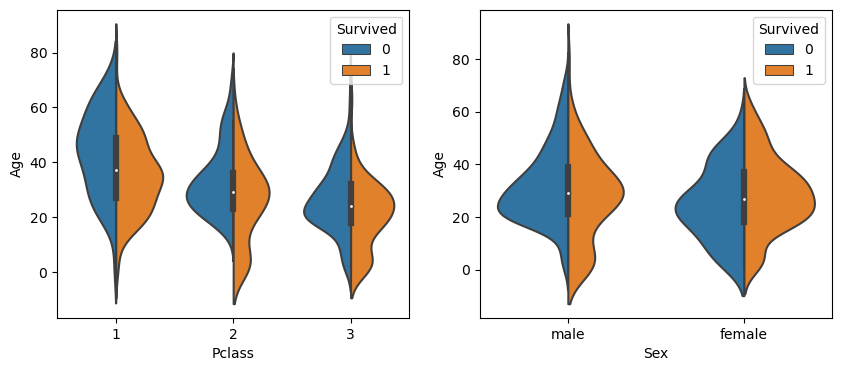

In [6]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train, split=True, ax=ax[0])
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train, split=True, ax=ax[1])
plt.show()

In [7]:
train[train['Age'].isnull()]['Name']

5                              Moran, Mr. James
17                 Williams, Mr. Charles Eugene
19                      Masselmani, Mrs. Fatima
26                      Emir, Mr. Farred Chehab
28                O'Dwyer, Miss. Ellen "Nellie"
                         ...                   
859                            Razi, Mr. Raihed
863           Sage, Miss. Dorothy Edith "Dolly"
868                 van Melkebeke, Mr. Philemon
878                          Laleff, Mr. Kristo
888    Johnston, Miss. Catherine Helen "Carrie"
Name: Name, Length: 177, dtype: object

In [8]:
train['AgeName'] = train['Name'].str.extract('([A-Za-z]+)\.')
test['AgeName'] = test['Name'].str.extract('([A-Za-z]+)\.')

In [9]:
pd.crosstab(train['Sex'], train['AgeName']).style.background_gradient(axis=0)

AgeName,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [10]:
pd.crosstab(test['Sex'], test['AgeName']).style.background_gradient(cmap='Blues')

AgeName,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,1,0,0,78,0,72,1,0
male,2,0,1,21,0,240,0,0,2


In [11]:
train['AgeName'].replace(['Capt','Col','Countess','Don','Dr','Jonkheer','Lady',
                               'Major','Mlle','Mme','Ms','Rev','Sir'],
                         ['Mr','Other','Mrs','Mr','Mr','Other','Mrs',
                              'Mr','Miss','Miss','Miss','Other','Mr'], inplace=True)
test['AgeName'].replace(['Col','Dona','Dr','Ms','Rev'],
                        ['Other','Miss','Mr','Miss','Other'], inplace=True)
train.groupby('AgeName')['Age'].mean().to_frame().astype(int)

,Age
AgeName,
Master,4
Miss,21
Mr,32
Mrs,35
Other,45


In [12]:
# def fill_Age_use_AgeName(x):
#     null_idx = x.isnull().index
#     train.loc[null_idx,'Age'] = x.mean()['Age']

# train.groupby('AgeName').apply(fill_with_meanage)

In [13]:
def fill_Age_use_AgeName(df1, df2):
    fill_df = df1.groupby('AgeName')['Age'].mean().to_frame().astype(int)
    AgeName_li = list(fill_df.index)
    Age_li = list(fill_df['Age'])
    for i in range(len(AgeName_li)):
        df2.loc[(df2['Age'].isnull())&(df2['AgeName']==AgeName_li[i]),'Age'] = Age_li[i]
        
fill_Age_use_AgeName(train, test)
fill_Age_use_AgeName(train, train)

In [14]:
train_check = train.copy()
train_check['Cabin_C'] = train_ckeck['Cabin'].str.extract('([A-Za-z]+)')
train_ckeck['Cabin_C'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_C, dtype: int64

In [15]:
pd.crosstab(train_ckeck['Cabin_C'], train_ckeck['Pclass']
           ).T.style.background_gradient(cmap='Blues')

Cabin_C,A,B,C,D,E,F,G,T
Pclass,,,,,,,,
1,15,47,59,29,25,0,0,1
2,0,0,0,4,4,8,0,0
3,0,0,0,0,3,5,4,0


In [16]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.643288,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.278897,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
bins = list(range(0, 521, 52))
bins_label = list(range(26,540,52))
train['FareCut'] = pd.cut(train['Fare'], bins, right=False, labels=bins_label)
test['Fare'] = test['Fare'].replace(np.nan, test['Fare'].mode()[0])
test['FareCut'] = pd.cut(test['Fare'], bins, right=False, labels=bins_label)

In [18]:
drop_cols = ['PassengerId','Name','Ticket','Fare','Cabin','AgeName']
train.drop(columns=drop_cols, inplace=True)
test.drop(columns=drop_cols, inplace=True)

In [19]:
def concat_dummies(df, dummy_col):
    dummies = pd.get_dummies(df[dummy_col])
    df = pd.concat([df, dummies], axis=1)
    return df.drop(columns=dummy_col)
    
dummy_col = ['Sex','Embarked']
train = concat_dummies(train, dummy_col)
test = concat_dummies(test, dummy_col)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Age         891 non-null    float64 
 3   SibSp       891 non-null    int64   
 4   Parch       891 non-null    int64   
 5   FareCut     891 non-null    category
 6   Sex_female  891 non-null    uint8   
 7   Sex_male    891 non-null    uint8   
 8   Embarked_C  891 non-null    uint8   
 9   Embarked_Q  891 non-null    uint8   
 10  Embarked_S  891 non-null    uint8   
dtypes: category(1), float64(1), int64(4), uint8(5)
memory usage: 40.5 KB


C:\Users\Playdata\AppData\Local\Temp\ipykernel_19160\2785141731.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  co_matrix = train.corr()


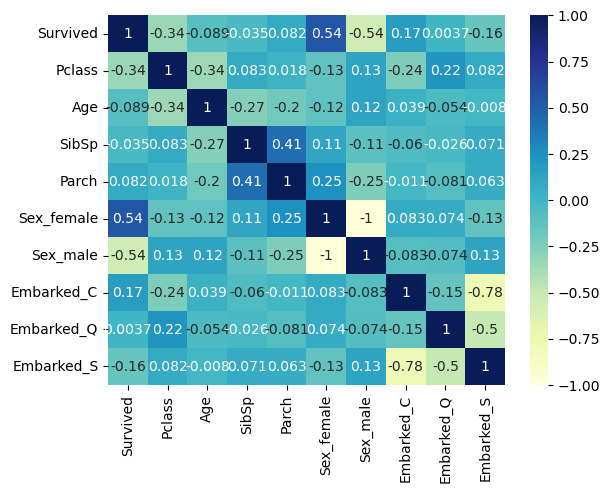

In [21]:
co_matrix = train.corr()
sns.heatmap(co_matrix, cmap="YlGnBu", annot=True)
plt.show()

In [22]:
X_train = train.drop(columns=['Survived'])
y_train = train['Survived']
X_train.shape, y_train.shape

((891, 10), (891,))

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score # 교차검증
scoring = 'accuracy'
cv = 5
score = {}

In [27]:
# LogisticRegression
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
model = LogisticRegression(max_iter=10000)
score['LogisticRegression'] = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=scoring)

# DecisionTreeClassifier
model = DecisionTreeClassifier()
score['DecisionTreeClassifier'] = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring)

# SVC
model = SVC()
score['SVC'] = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring)

# RandomForestClassifier
model = RandomForestClassifier(n_estimators=13)
score['RandomForestClassifier'] = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=1, scoring=scoring)

# KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=13)
score['KNeighborsClassifier'] = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring)

# GaussianNB
model = GaussianNB()
score['GaussianNB'] = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring)

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

In [28]:
# 교차검증 평균 정확도%
for k,v in score.items():
    print(k,':',round(np.mean(v)*100,2))
    
# 제일 높은모델로 테스트

LinReg_rmse : 0.38395280474533594
SGDReg_rmse : 0.3837497316091922
Poly_LinReg_rmse : 208375.1366877424
Poly_SGDReg_rmse : 0.3778256093583973
LogisticRegression : 78.68
DecisionTreeClassifier : 79.24
SVC : 68.14
RandomForestClassifier : 79.58
KNeighborsClassifier : 75.77
GaussianNB : 78.9


In [29]:
# start test
test_model = RandomForestClassifier()
test_model.fit(X_train, y_train)

import collections
pred = test_model.predict(test)
pred.shape, collections.Counter(pred), submission.shape, collections.Counter(submission['Survived'])

((418,), Counter({0: 264, 1: 154}), (418, 2), Counter({0: 266, 1: 152}))

In [30]:
from sklearn.metrics import accuracy_score
round(accuracy_score(submission['Survived'], pred)*100,2)

80.86

In [ ]:
# submission['Survived'] = pred
# ver = 1
# submission.to_csv('./output/submission_titanic_{}.csv'.format(ver), index = False)